# Optimise multi energy


In [1]:
import jpype
jpype.startJVM(jpype.getDefaultJVMPath())

In [71]:
import multiprocessing as mp
import os 
from __future__ import print_function
import pybobyqa
from cpymad.madx import Madx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import glob
import json
import pybt
from pybt.tools.plotters import *
from pybt.tools.parsers import read_twiss_file
from pybt.myjson.encoder import myJSONDecoder
from os import walk
import matplotlib.dates as mdates
import pickle
from datetime import datetime
from scipy.optimize import curve_fit
from skimage import filters
from scipy import integrate
import logging
import requests
from madxtools.math import *

def my_mpl_style():
    '''Sets my preferred style options for matplotlib.'''
    import matplotlib as mpl
    # Font sizes
    mpl.rcParams['axes.labelsize'] = 18
    mpl.rcParams['legend.fontsize'] = 14
    mpl.rcParams['axes.titlesize'] = 20  # Change the number for your preferred fontsize
    mpl.rcParams['xtick.labelsize'] = 16
    mpl.rcParams['ytick.labelsize'] = 16
    mpl.rcParams['axes.formatter.limits'] = (-2, 3)
my_mpl_style()

# Filter measurement

In [3]:
# start_path = "/eos/home-e/eljohnso/SWAN_projects/quad-scan-east/df/small_df/"
start_path = "../quad_scan_east_slow_ions_2023_2gev/df/"
end_path = ""
mypath = start_path+"/"+end_path

f = []
for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    break
filenames = sorted(filenames)

In [4]:
filenames

['quad_scan_east_slow_ions_2023_2GeV_2023_09_05_12h15m10s_df.pickle',
 'quad_scan_east_slow_ions_2023_2GeV_2023_09_05_13h19m11s_df.pickle',
 'quad_scan_east_slow_ions_2023_2GeV_2023_09_05_13h57m22s_df.pickle',
 'quad_scan_east_slow_ions_2023_2GeV_2023_09_05_14h37m04s_df.pickle',
 'quad_scan_east_slow_ions_2023_2GeV_2023_09_05_15h13m20s_df.pickle',
 'quad_scan_east_slow_ions_2023_2GeV_2023_09_05_16h19m47s_df.pickle',
 'quad_scan_east_slow_ions_2023_2GeV_2023_10_02_09h23m05s_df.pickle',
 'quad_scan_east_slow_ions_2023_2GeV_2023_10_02_10h11m04s_df.pickle',
 'quad_scan_east_slow_ions_2023_2GeV_2023_10_02_10h57m45s_df.pickle',
 'quad_scan_east_slow_ions_2023_2GeV_2023_10_02_11h32m04s_df.pickle',
 'quad_scan_east_slow_ions_2023_2GeV_2023_10_02_11h56m29s_df.pickle']

In [5]:
# Select all measurements available
new_df = pd.DataFrame()

j = 0
for i in range(len(filenames)):
    with open(start_path+filenames[i], 'rb') as handle:
        df = pickle.load(handle)
        # print(len(df))
        print(filenames[i])
    new_df = pd.concat([new_df,df])

new_df.reset_index(inplace=True)

quad_scan_east_slow_ions_2023_2GeV_2023_09_05_12h15m10s_df.pickle
quad_scan_east_slow_ions_2023_2GeV_2023_09_05_13h19m11s_df.pickle
quad_scan_east_slow_ions_2023_2GeV_2023_09_05_13h57m22s_df.pickle
quad_scan_east_slow_ions_2023_2GeV_2023_09_05_14h37m04s_df.pickle
quad_scan_east_slow_ions_2023_2GeV_2023_09_05_15h13m20s_df.pickle
quad_scan_east_slow_ions_2023_2GeV_2023_09_05_16h19m47s_df.pickle
quad_scan_east_slow_ions_2023_2GeV_2023_10_02_09h23m05s_df.pickle
quad_scan_east_slow_ions_2023_2GeV_2023_10_02_10h11m04s_df.pickle
quad_scan_east_slow_ions_2023_2GeV_2023_10_02_10h57m45s_df.pickle
quad_scan_east_slow_ions_2023_2GeV_2023_10_02_11h32m04s_df.pickle
quad_scan_east_slow_ions_2023_2GeV_2023_10_02_11h56m29s_df.pickle


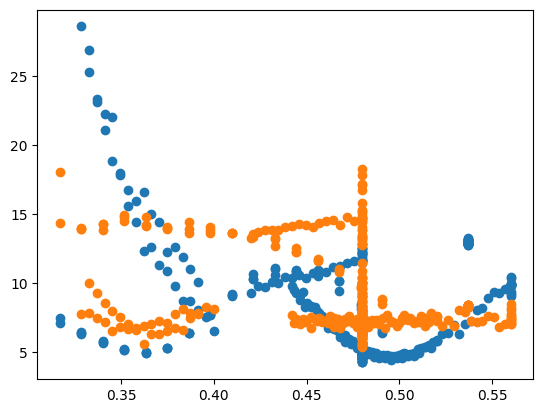

In [6]:
fig, ax = plt.subplots()
ax.scatter(new_df.k_qfn01, new_df.sigH)
ax.scatter(new_df.k_qfn01, new_df.sigV)

In [7]:
# new_df = new_df.iloc[0:16]

In [8]:
# 2 GeV
# Select all measurements available
new_df = pd.DataFrame()

j = 0
for i in range(len(filenames)):
    with open(start_path+filenames[i], 'rb') as handle:
        df = pickle.load(handle)
        print(filenames[i])
    if filenames[i] in [
        # 'quad_scan_east_slow_ions_2023_2GeV_2023_09_05_12h15m10s_df.pickle',
        # 'quad_scan_east_slow_ions_2023_2GeV_2023_09_05_13h19m11s_df.pickle',
        # 'quad_scan_east_slow_ions_2023_2GeV_2023_09_05_13h57m22s_df.pickle',
        # 'quad_scan_east_slow_ions_2023_2GeV_2023_09_05_14h37m04s_df.pickle',
        # 'quad_scan_east_slow_ions_2023_2GeV_2023_09_05_15h13m20s_df.pickle',
        # 'quad_scan_east_slow_ions_2023_2GeV_2023_09_05_16h19m47s_df.pickle',
        # 'quad_scan_east_slow_ions_2023_2GeV_2023_10_02_09h23m05s_df.pickle',
        # 'quad_scan_east_slow_ions_2023_2GeV_2023_10_02_10h11m04s_df.pickle',
        # 'quad_scan_east_slow_ions_2023_2GeV_2023_10_02_10h57m45s_df.pickle',
        # 'quad_scan_east_slow_ions_2023_2GeV_2023_10_02_11h32m04s_df.pickle',
        'quad_scan_east_slow_ions_2023_2GeV_2023_10_02_11h56m29s_df.pickle',
                        ]:    
        new_df = pd.concat([new_df,df])

new_df.reset_index(inplace=True)


# # 1.4 GeV
# # Select all measurements available
# new_df = pd.DataFrame()

# j = 0
# for i in range(len(filenames)):
#     with open(start_path+filenames[i], 'rb') as handle:
#         df = pickle.load(handle)
#         print(filenames[i])
#     if filenames[i] in [
#         # 'quad_scan_east_slow_ions_2023_1_4GeV_2023_10_02_13h11m25s_df.pickle',
#         # 'quad_scan_east_slow_ions_2023_1_4GeV_2023_10_02_13h58m16s_df.pickle',
#         # 'quad_scan_east_slow_ions_2023_1_4GeV_2023_10_02_14h59m19s_df.pickle',
#         # 'quad_scan_east_slow_ions_2023_1_4GeV_2023_10_09_14h27m51s_df.pickle',
#         'quad_scan_east_slow_ions_2023_1_4GeV_2023_10_09_15h07m39s_df.pickle',
#         # 'quad_scan_east_slow_ions_2023_1_4GeV_2023_10_09_15h50m08s_df.pickle',
#                         ]:    
#         new_df = pd.concat([new_df,df])

# new_df.reset_index(inplace=True)

# # 1.0 GeV
# # Select all measurements available
# new_df = pd.DataFrame()

# j = 0
# for i in range(len(filenames)):
#     with open(start_path+filenames[i], 'rb') as handle:
#         df = pickle.load(handle)
#         print(filenames[i])
#     if filenames[i] in [
#         'quad_scan_east_slow_ions_2023_1GeV_2023_10_09_16h49m30s_df.pickle',
#         'quad_scan_east_slow_ions_2023_1GeV_2023_10_09_17h06m57s_df.pickle',
#                         ]:
#         new_df = pd.concat([new_df,df])

# new_df.reset_index(inplace=True)

# 2.0 H
'quad_scan_east_slow_ions_2023_2GeV_2023_10_02_11h56m29s_df.pickle',
# 1.4 H
'quad_scan_east_slow_ions_2023_1_4GeV_2023_10_09_15h07m39s_df.pickle',
# 1.0 H
'quad_scan_east_slow_ions_2023_1GeV_2023_10_09_16h49m30s_df.pickle',

quad_scan_east_slow_ions_2023_2GeV_2023_09_05_12h15m10s_df.pickle
quad_scan_east_slow_ions_2023_2GeV_2023_09_05_13h19m11s_df.pickle
quad_scan_east_slow_ions_2023_2GeV_2023_09_05_13h57m22s_df.pickle
quad_scan_east_slow_ions_2023_2GeV_2023_09_05_14h37m04s_df.pickle
quad_scan_east_slow_ions_2023_2GeV_2023_09_05_15h13m20s_df.pickle
quad_scan_east_slow_ions_2023_2GeV_2023_09_05_16h19m47s_df.pickle
quad_scan_east_slow_ions_2023_2GeV_2023_10_02_09h23m05s_df.pickle
quad_scan_east_slow_ions_2023_2GeV_2023_10_02_10h11m04s_df.pickle
quad_scan_east_slow_ions_2023_2GeV_2023_10_02_10h57m45s_df.pickle
quad_scan_east_slow_ions_2023_2GeV_2023_10_02_11h32m04s_df.pickle
quad_scan_east_slow_ions_2023_2GeV_2023_10_02_11h56m29s_df.pickle


('quad_scan_east_slow_ions_2023_1GeV_2023_10_09_16h49m30s_df.pickle',)

In [9]:
with open("../quad_scan_east_slow_ions_2023_2gev/df/quad_scan_east_slow_ions_2023_2GeV_2023_10_02_11h56m29s_df.pickle", 'rb') as handle:
    df_2Gev = pickle.load(handle)
with open("../quad_scan_east_slow_ions_2023_1_4gev/df/quad_scan_east_slow_ions_2023_1_4GeV_2023_10_09_15h07m39s_df.pickle", 'rb') as handle:
    df_1_4Gev = pickle.load(handle)
with open("../quad_scan_east_slow_ions_2023_1gev/df/quad_scan_east_slow_ions_2023_1GeV_2023_10_09_16h49m30s_df.pickle", 'rb') as handle:
    df_1Gev = pickle.load(handle)

Text(0.5, 0, 'K1 QFN01')

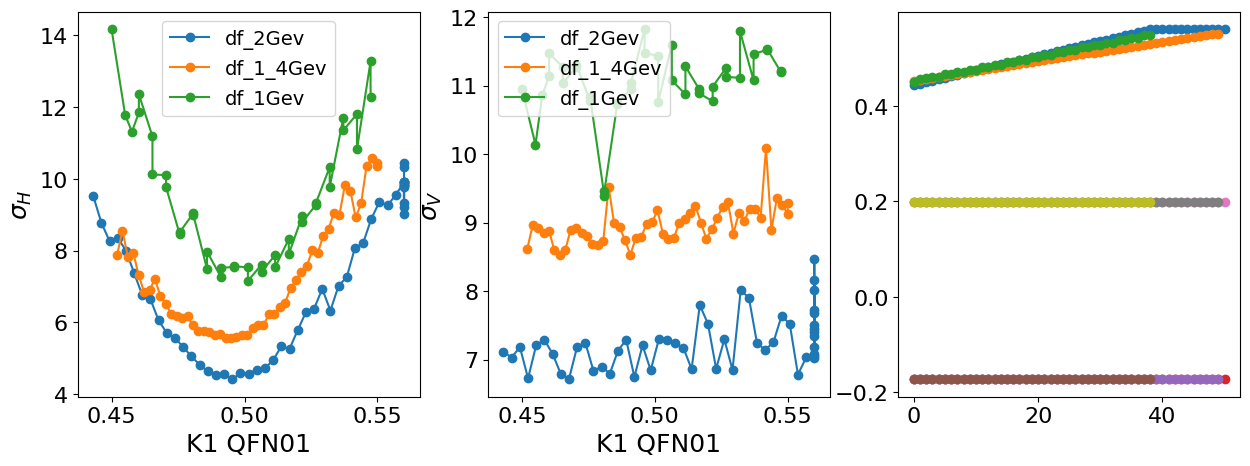

In [72]:
fig, ax = plt.subplots(1,3, figsize=(15,5))


ax[0].plot(df_2Gev.k_qfn01, df_2Gev.sigH, marker="o", label="df_2Gev")
ax[1].plot(df_2Gev.k_qfn01, df_2Gev.sigV, marker="o", label="df_2Gev")
ax[0].plot(df_1_4Gev.k_qfn01, df_1_4Gev.sigH, marker="o", label="df_1_4Gev")
ax[1].plot(df_1_4Gev.k_qfn01, df_1_4Gev.sigV, marker="o", label="df_1_4Gev")
ax[0].plot(df_1Gev.k_qfn01, df_1Gev.sigH, marker="o", label="df_1Gev")
ax[1].plot(df_1Gev.k_qfn01, df_1Gev.sigV, marker="o", label="df_1Gev")


ax[2].plot(df_2Gev.k_qfn01, marker="o", label="df_2Gev")
ax[2].plot(df_1_4Gev.k_qfn01, marker="o", label="df_1_4Gev")
ax[2].plot(df_1Gev.k_qfn01, marker="o", label="df_1Gev")

ax[2].plot(df_2Gev.k_qdn02, marker="o", label="df_2Gev")
ax[2].plot(df_1_4Gev.k_qdn02, marker="o", label="df_1_4Gev")
ax[2].plot(df_1Gev.k_qdn02, marker="o", label="df_1Gev")

ax[2].plot(df_2Gev.k_qfn03, marker="o", label="df_2Gev")
ax[2].plot(df_1_4Gev.k_qfn03, marker="o", label="df_1_4Gev")
ax[2].plot(df_1Gev.k_qfn03, marker="o", label="df_1Gev")

ax[0].legend()
ax[1].legend()

ax[0].set_ylabel(r"$\sigma_{H}$")
ax[0].set_xlabel("K1 QFN01")

ax[1].set_ylabel(r"$\sigma_{V}$")
ax[1].set_xlabel("K1 QFN01")


In [104]:
def set_energy(madx, p, ex, ey, charge):
    madx.command.beam(particle='PROTON',pc=str(p/charge),ex=ex,ey=ey)
    madx.input('BRHO      := BEAM->PC * 3.3356;')
    madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APER_1,APER_2,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')  
    madx.use(sequence="f61d")
    return

def compute_objective(madx, df, btv, betx0, bety0, alfx0, alfy0, dx0, dy0, dpx0, dpy0, ex, ey, sige):
    H_sigma_madx_list = []
    V_sigma_madx_list = []
    index_btv = 34
    for i in range(len(df)):

        k_qfn01 = df.iloc[i].k_qfn01
        k_qdn02 = df.iloc[i].k_qdn02
        k_qfn03 = df.iloc[i].k_qfn03

        madx.input("kQFN1 = "+str(k_qfn01)+";")
        madx.input("kQDN2 = "+str(k_qdn02)+";")
        madx.input("kQFN3 = "+str(k_qfn03)+";")

        twiss_f61d = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=dx0, Dy=dy0, Dpx=dpx0, Dpy=dpy0)
        # index_btv = np.where(twiss_f61d['name'] == f"{btv}:1")[0]
        H_sigma_madx = ( beam_size(float(twiss_f61d['betx'][index_btv]), float(twiss_f61d['dx'][index_btv]), ex, sige, 1) )*1000
        V_sigma_madx = ( beam_size(float(twiss_f61d['bety'][index_btv]), float(twiss_f61d['dy'][index_btv]), ey, sige, 1) )*1000

        H_sigma_madx_list.append(H_sigma_madx)
        V_sigma_madx_list.append(V_sigma_madx)

    # Objective
    objective_H = np.array(abs(H_sigma_madx_list-df.sigH)**2).sum()
    objective_V = np.array(abs(V_sigma_madx_list-df.sigV)**2).sum()
    objective = objective_H
    return(objective, H_sigma_madx_list, V_sigma_madx_list)

# Simple Py-Bobyqua

In [105]:
# Global variables
charge = 54.0
btv="f61.btv010"

madx = Madx()
madx.option(verbose=False, debug=False, echo=False, warn=False, twiss_print=False)
madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61d/f61d.ele").text) 
madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61d/f61d.str").text) 
madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61d/f61d.seq").text) 
madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61d/f61d.dbx").text) 

# Define the objective function
def f_fit(params):
    print(params)
    betx0, alfx0, dx0, dpx0, exn, sige = params

    # Beam specific variables
    # betx0 = 44.093
    # alfx0 = -10.723
    # dx0 = 0.13
    # dpx0 = 0.02
    # exn = 
    # sige = 0.0045

    bety0 = 3.821
    alfy0 = 0.958
    eyn = 1.041e-05
    dy0 = 0.0
    dpy0 = 0.0



    # Computation
    objective_sum = None

    p, beta, gamma = pb_ion_p_beta_gamma(2.0)
    ex = exn/(beta*gamma)
    ey = eyn/(beta*gamma)
    set_energy(madx, p, ex, ey, charge)
    objective, _, _ = compute_objective(madx, df_2Gev, btv, betx0, bety0, alfx0, alfy0, dx0, dy0, dpx0, dpy0, ex, ey, sige)
    objective_sum = objective

    p, beta, gamma = pb_ion_p_beta_gamma(1.4)
    ex = exn/(beta*gamma)
    ey = eyn/(beta*gamma)
    set_energy(madx, p, ex, ey, charge)
    objective, _, _ = compute_objective(madx, df_1_4Gev, btv, betx0, bety0, alfx0, alfy0, dx0, dy0, dpx0, dpy0, ex, ey, sige)
    objective_sum = objective_sum + objective

    p, beta, gamma = pb_ion_p_beta_gamma(1.0)
    ex = exn/(beta*gamma)
    ey = eyn/(beta*gamma)
    set_energy(madx, p, ex, ey, charge)
    objective, _, _ = compute_objective(madx, df_1Gev, btv, betx0, bety0, alfx0, alfy0, dx0, dy0, dpx0, dpy0, ex, ey, sige)
    objective_sum = objective_sum + objective

    print(objective_sum,"\n")
    return objective_sum


initial_guess = [44, -11, 0.13, 0.02, 3.394e-5, 0.001381]

lower = np.array([1, -50, -5, -5, 0.0, 0.0])
upper = np.array([100, 0, 5, 5, 5.0e-5, 1.0e-2])

# Call Py-BOBYQA
soln = pybobyqa.solve(f_fit, initial_guess, bounds=(lower, upper), rhobeg=0.5, objfun_has_noise=False, seek_global_minimum=False, scaling_within_bounds=True, rhoend=1e-5, maxfun=500)

# Display output
print(soln)


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.09.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2023.05.05               +
  + Execution date: 2023.10.13 16:32:34      +
  ++++++++++++++++++++++++++++++++++++++++++++
[ 4.400e+01 -1.100e+01  1.300e-01  2.000e-02  3.394e-05  1.381e-03]
156.58997454601962 

[ 9.350e+01 -1.100e+01  1.300e-01  2.000e-02  3.394e-05  1.381e-03]
184929.51034537304 

[4.400e+01 0.000e+00 1.300e-01 2.000e-02 3.394e-05 1.381e-03]
318438.07592193503 

[ 4.400e+01 -1.100e+01  5.000e+00  2.000e-02  3.394e-05  1.381e-03]
73317.67980578777 

[ 4.400e+01 -1.100e+01  1.300e-01  5.000e+00  3.394e-05  1.381e-03]
1562334.1010657633 

[ 4.400e+01 -1.100e+01  1.300e-01  2.000e-02  5.000e-05  1.381e-03]
486.65882625699214 

[ 4.400e+01 -1.100e+01  1.300e-01  2.000e-02  3.394e-05  6.381e-03]
295.22863909506316 

[ 1.000e+00 -1.100e+01  1.300e-01  2.000e-02  3.394e-05  1.381e-03]
16581035.305443387 

[ 4.400e+01 

In [92]:
print(round(soln.x[0],3))
print(round(soln.x[1],3))
print(round(soln.x[2],3))
print(round(soln.x[3],3))
print(round(soln.x[4],10))
print(round(soln.x[5],3))

31.589
-7.83
-0.067
0.013
3.6261e-05
0.004


# Check solution

In [106]:
fig, ax = plt.subplots(1,figsize=(15,5))

# Beam specific variables
betx0 = 51.589
alfx0 = -12.83
dx0 = 0.13
dpx0 = 0.02
exn = 3.6261e-05
sige = 0.004

bety0 = 3.821
alfy0 = 0.958
eyn = 1.041e-05
dy0 = 0.0
dpy0 = 0.0

ax.plot(df_2Gev.k_qfn01, df_2Gev.sigH, marker="o", label="df_2Gev")
p, beta, gamma = pb_ion_p_beta_gamma(2.0)
ex = exn/(beta*gamma)
ey = eyn/(beta*gamma)
set_energy(madx, p, ex, ey, charge)
objective, H_sigma_madx_list, V_sigma_madx_list = compute_objective(madx, df_2Gev, btv, betx0, bety0, alfx0, alfy0, dx0, dy0, dpx0, dpy0, ex, ey, sige)
ax.plot(df_2Gev.k_qfn01, H_sigma_madx_list, marker="o", label="df_2Gev")

ax.plot(df_1_4Gev.k_qfn01, df_1_4Gev.sigH, marker="o", label="df_1_4Gev")
p, beta, gamma = pb_ion_p_beta_gamma(1.4)
ex = exn/(beta*gamma)
ey = eyn/(beta*gamma)
set_energy(madx, p, ex, ey, charge)
objective, H_sigma_madx_list, V_sigma_madx_list = compute_objective(madx, df_1_4Gev, btv, betx0, bety0, alfx0, alfy0, dx0, dy0, dpx0, dpy0, ex, ey, sige)
ax.plot(df_1_4Gev.k_qfn01, H_sigma_madx_list, marker="o", label="df_1_4Gev")

ax.plot(df_1Gev.k_qfn01, df_1Gev.sigH, marker="o", label="df_1Gev")
p, beta, gamma = pb_ion_p_beta_gamma(1.0)
ex = exn/(beta*gamma)
ey = eyn/(beta*gamma)
set_energy(madx, p, ex, ey, charge)
objective, H_sigma_madx_list, V_sigma_madx_list = compute_objective(madx, df_1Gev, btv, betx0, bety0, alfx0, alfy0, dx0, dy0, dpx0, dpy0, ex, ey, sige)
ax.plot(df_1Gev.k_qfn01, H_sigma_madx_list, marker="o", label="df_1Gev")

ax.legend()

# Box with initial parameters
textstr = '\n'.join((
    "Matched initial parameters:",
    r'$\beta_{x}$='+str(round(betx0,3)),
    r'$\beta_{y}$='+str(round(bety0,3)),
    r'$\alpha_{x}$='+str(round(alfx0,3)),
    r'$\alpha_{y}$='+str(round(alfy0,3)),
    r'$D_{x}$='+str(round(dx0,3)),
    r'$D_{y}$='+str(round(dy0,3)),
    r'$D_{px}$='+str(round(dpx0,3)),
    r'$D_{py}$='+str(round(dpy0,3)),
    r'$exn$='+str(round(exn,8)),
    r'$eyn$='+str(round(eyn,8)),
    r'$\frac{dp}{p}$='+str(round(sige,6)),
    ))

props = dict(boxstyle='square', facecolor='white', alpha=0.7)

# place a text box in upper left in axes coords
ax.text(0.7, 0.95, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

Text(0.7, 0.95, 'Matched initial parameters:\n$\\beta_{x}$=51.589\n$\\beta_{y}$=3.821\n$\\alpha_{x}$=-12.83\n$\\alpha_{y}$=0.958\n$D_{x}$=0.13\n$D_{y}$=0.0\n$D_{px}$=0.02\n$D_{py}$=0.0\n$exn$=3.626e-05\n$eyn$=1.041e-05\n$\\frac{dp}{p}$=0.004')

In [63]:
p, beta, gamma = pb_ion_p_beta_gamma(2.0)
set_energy(madx, p, ex, ey, charge)
objective, _, _ = compute_objective(madx, df_2Gev, btv, betx0, bety0, alfx0, alfy0, dx0, dy0, dpx0, dpy0, ex, ey, sige)
print(objective)

p, beta, gamma = pb_ion_p_beta_gamma(1.4)
set_energy(madx, p, ex, ey, charge)
objective, _, _ = compute_objective(madx, df_2Gev, btv, betx0, bety0, alfx0, alfy0, dx0, dy0, dpx0, dpy0, ex, ey, sige)
print(objective)

p, beta, gamma = pb_ion_p_beta_gamma(1.0)
set_energy(madx, p, ex, ey, charge)
objective, _, _ = compute_objective(madx, df_2Gev, btv, betx0, bety0, alfx0, alfy0, dx0, dy0, dpx0, dpy0, ex, ey, sige)
print(objective)

93.0266770615371
93.34743814065178
93.81524741249086


In [67]:

p, beta, gamma = pb_ion_p_beta_gamma(2.0)
twiss_f61d = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=dx0, Dy=dy0, Dpx=dpx0, Dpy=dpy0).dframe()
H_sigma_madx = ( beam_size(twiss_f61d['betx'][btv], twiss_f61d['dx'][btv], ex, sige, 1) )*1000
print(H_sigma_madx)

p, beta, gamma = pb_ion_p_beta_gamma(1.0)
twiss_f61d = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=dx0, Dy=dy0, Dpx=dpx0, Dpy=dpy0).dframe()
H_sigma_madx = ( beam_size(twiss_f61d['betx'][btv], twiss_f61d['dx'][btv], ex, sige, 1) )*1000
print(H_sigma_madx)

10.956365987149928
10.956365987149928
